# <center><font color ="red">Suivi de l’évolution d’une transformation chimique par spectrophotométrie  </font></center>

**Capacité numérique** : À l’aide d’un langage de programmation et à partir de données expérimentales, tracer l’évolution temporelle d’une concentration, d’une vitesse volumique d’apparition ou de disparition et tester une relation entre la vitesse volumique de disparition et la concentration d'un réactif.

In [1]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#Création d'un dictionnaire contenant les valeurs de d'absorbances mesurées
mesures = []
with open('tp7_etalonnage.csv', newline='') as csvfile:
    file = csv.DictReader(csvfile, delimiter=";")
    for ligne in file:
        mesures.append(dict(ligne))

print(np.array(mesures))

[{'[I2] (mol/L)': '0', 'A': '0'} {'[I2] (mol/L)': '0.0005', 'A': '0.267'}
 {'[I2] (mol/L)': '0.001', 'A': '0.511'}
 {'[I2] (mol/L)': '0.0025', 'A': '1.215'}
 {'[I2] (mol/L)': '0.004', 'A': '1.9'}
 {'[I2] (mol/L)': '0.005', 'A': '2.301'}]


In [3]:
C=[] 
A=[]
for couple in mesures:
    C.append(float(couple['[I2] (mol/L)']))
    A.append(float(couple['A']))
print(np.array(C))
print(np.array(A))

[0.     0.0005 0.001  0.0025 0.004  0.005 ]
[0.    0.267 0.511 1.215 1.9   2.301]


![center](polyfit.png)

k =  4.61e+02  b =  3.42e-02


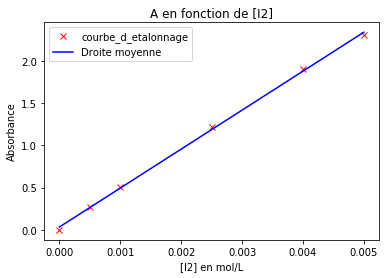

In [4]:
#------------------------------------------------------------------------------
#           Tracé du graphique
#------------------------------------------------------------------------------

#Tracé du nuage de points
nom="courbe_d_etalonnage"
plt.plot(C,A,"rx",label=nom) 

#Titres des axes et du graphique
plt.title("A en fonction de [I2]",color='black')
plt.ylabel('Absorbance')#nom de l'axe des ordonnées
plt.xlabel("[I2] en mol/L")#nom des axes des abscisses

#modélisation linéaire de la courbe
#k=coef directeur de la droite
#b=ordonnée à l'origine
k,b = np.polyfit(C,A,1)

#écriture de k et b en notation scientifique avec deux chiffres après la virgule
print("k = ", format(k,".2e")," b = " ,format(b,".2e")) 

#création du tableau des ordonnées A de la droite moyenne
A_mod=[]
for i in range(len(C)):
    A_mod.append(k*C[i]+b)
    
#Tracé de la droite moyenne
plt.plot(C,A_mod,"b-",label="Droite moyenne")

#affichage de la légende
plt.legend()
plt.show() 

B très proche de 0 donc A = k x [I$_{2}$]
A est bien proportionnel à [I$_{2}$]. La loi de Beer-Lambert est vérifiée.


In [5]:
###### Création d'un dictionnaire contenant les valeurs de d'absorbances mesurées
suivi_spectro = []
with open('tp7_mesures-suivi-spectro.csv', newline='') as csvfile:
    file = csv.DictReader(csvfile, delimiter=";")
    for ligne in file:
        suivi_spectro.append(dict(ligne))

print(np.array(suivi_spectro))

[{'date ti de prélèvement (min)': '0', 'A': '0.00'}
 {'date ti de prélèvement (min)': '2', 'A': '0.333'}
 {'date ti de prélèvement (min)': '3.5', 'A': '0.6'}
 {'date ti de prélèvement (min)': '6', 'A': '0.913'}
 {'date ti de prélèvement (min)': '8', 'A': '1.154'}
 {'date ti de prélèvement (min)': '10.5', 'A': '1.373'}
 {'date ti de prélèvement (min)': '13', 'A': '1.559'}
 {'date ti de prélèvement (min)': '15', 'A': '1.691'}
 {'date ti de prélèvement (min)': '18', 'A': '1.852'}
 {'date ti de prélèvement (min)': '22', 'A': '2.016'}
 {'date ti de prélèvement (min)': '25', 'A': '2.107'}
 {'date ti de prélèvement (min)': '30', 'A': '2.205'}
 {'date ti de prélèvement (min)': '35', 'A': '2.27'}
 {'date ti de prélèvement (min)': '40', 'A': '2.312'}
 {'date ti de prélèvement (min)': '45', 'A': '2.334'}
 {'date ti de prélèvement (min)': '50', 'A': '2.358'}
 {'date ti de prélèvement (min)': '55', 'A': '2.37'}]


In [6]:
A_t=[] # récupération des valeurs d'absorbance
t=[] # récupération des valeurs du temps
for couple in suivi_spectro:
    A_t.append(float(couple['A']))
    t.append(float(couple['date ti de prélèvement (min)']))
print(np.array(A_t))
print(np.array(t))

[0.    0.333 0.6   0.913 1.154 1.373 1.559 1.691 1.852 2.016 2.107 2.205
 2.27  2.312 2.334 2.358 2.37 ]
[ 0.   2.   3.5  6.   8.  10.5 13.  15.  18.  22.  25.  30.  35.  40.
 45.  50.  55. ]


In [7]:
#Calcul de la concentration [I2] en fonction du temps en utilisant 
#le coefficient directeur de la droite d'étalonnage
C_t=[]
n_i2=[]
for i in range(len(A_t)):
    C_t.append(A_t[i]/k)
    n_i2.append(C_t[i]*0.02/1e-6)
print(np.array(C_t))
print(np.array(n_i2))


[0.         0.00072288 0.00130249 0.00198196 0.00250512 0.00298053
 0.00338431 0.00367085 0.00402036 0.00437637 0.00457391 0.00478665
 0.00492776 0.00501893 0.00506669 0.00511879 0.00514484]
[  0.          14.45765125  26.04982206  39.63914591  50.1024911
  59.61067616  67.686121    73.41708185  80.40711744  87.52740214
  91.47829181  95.73309609  98.55516014 100.37864769 101.33380783
 102.37580071 102.89679715]


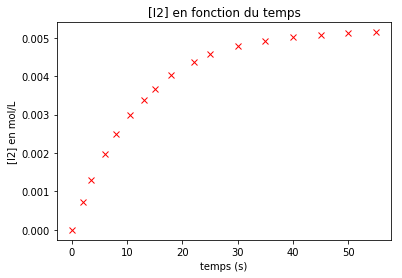

In [8]:
#------------------------------------------------------------------------------
#   Tracé de la concentration de diiode formé au cours du temps
#------------------------------------------------------------------------------

plt.plot(t,C_t,"rx") 

#Titres des axes et du graphique
plt.title("[I2] en fonction du temps",color='black')
plt.ylabel('[I2] en mol/L')#nom de l'axe des ordonnées
plt.xlabel("temps (s)")#nom des axes des abscisses

plt.show() 

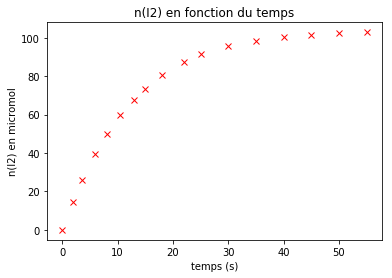

In [9]:
#------------------------------------------------------------------------------
#   Tracé de la quantité de diiode formé au cours du temps
#------------------------------------------------------------------------------

plt.plot(t,n_i2,"rx") 

#Titres des axes et du graphique
plt.title("n(I2) en fonction du temps",color='black')
plt.ylabel('n(I2) en micromol')#nom de l'axe des ordonnées
plt.xlabel("temps (s)")#nom des axes des abscisses

plt.show() 

In [10]:
#Calcul de la vitesse de formation du diiode en fonction du temps
v=[]
for i in range (0,len(C_t)-1):
    vi=((C_t[i+1]-C_t[i])/(t[i+1]-t[i]))
    v.append(vi)
print(np.array(v))
#------------------------------------------------------------------------------
#   Tracé de la vitesse volumique d'apparition du diiode formé au cours du temps
#------------------------------------------------------------------------------
#Il faut enlever la 1ère et la dernière valeurs du temps
temps=np.delete(t,len(t)-1) #on ne prend que les valeurs du temps à partir de la position 1 à l'avant dernière valeur

print(np.array(temps))
plt.plot(temps,v,"rx") 

#Titres des axes et du graphique
plt.title("v en fonction du temps",color='black')
plt.ylabel('v en mol.L-1.s-1')#nom de l'axe des ordonnées
plt.xlabel("temps (s)")#nom des axes des abscisses

plt.show() 

[3.61441281e-04 3.86405694e-04 2.71786477e-04 2.61583630e-04
 1.90163701e-04 1.61508897e-04 1.43274021e-04 1.16500593e-04
 8.90035587e-05 6.58481613e-05 4.25480427e-05 2.82206406e-05
 1.82348754e-05 9.55160142e-06 1.04199288e-05 5.20996441e-06]
[ 0.   2.   3.5  6.   8.  10.5 13.  15.  18.  22.  25.  30.  35.  40.
 45.  50. ]


## <font color=#3D6BBC >Quelle équation peut modéliser la vitesse de disparition du produit? </font>

![center](ordre-reaction.png)

![center](polyfit-complet.png)

Les points semblent alignés. On modélise la courbe par une fonction affine.

la vitesse d'apparition du diiode diminue en fonction de la formation de diiode.

**Remarque :** La fonction np.polyfit(x,y,2) modélise le nuage de points d'abscisses x et d'ordonnées y par la courbe d'équation y =ax$^{2}$ + bx +c et renvoie le tableau [a,b,c]

In [20]:
concI=[]
C2=5e-1
V2=10
Vtot=20
for i in range(len(C_t)):
    concI.append((C2*V2-2*C_t[i]*Vtot)/Vtot)


In [32]:
#Tracé de v en fonction de [I-]
plt.plot(concI,v,"rx") 

#modélisation affine de la courbe
#k=coef directeur de la droite
#b=ordonnée à l'origine
k,b = np.polyfit(concI,v,1)   

#écriture de k et b en notation scientifique avec deux chiffres après la virgule
print("k = ", format(k,".2e")," b = " ,format(b,".2e")) 

#création du tableau des ordonnées A de la droite moyenne
v_mod_I=[]
for i in range(len(concI)):
    v_mod_I.append(k*concI[i]+b)

#Tracé de la droite moyenne
plt.plot(concI,v_mod_I,"b-",label="Droite moyenne")

#Titres des axes et du graphique
plt.title("v en fonction de la concentration d'ion iodure",color='black')
plt.ylabel('v en mol.L-1.s-1')#nom de l'axe des ordonnées
plt.xlabel("concentration d'ion iodure formé en mol/L")#nom des axes des abscisses
plt.legend()

plt.show()


k =  3.78e-02  b =  -9.06e-03


La courbe est une droite passant par l'origine. L'ordonnée à l'origne est négligeable.
La vitesse de disparition des ions iodures et la concentration des ions iodures sont propoirtionnelles.
On obtient une loi de vitesse d'ordre 1. 

In [31]:
print("La relation de la vitesse de disparition des ions iodures est v= ",format(k,".2e"), "xC")

La relation de la vitesse de disparition des ions iodures est v=  3.78e-02 xC


In [11]:
#Tracé de v en fonction de [I2]
C_t=C_t[0:len(t)-1]
plt.plot(C_t,v,"rx") 

#Titres des axes et du graphique
plt.title("v en fonction de la concentration de diiode",color='black')
plt.ylabel('v en mol.L-1.s-1')#nom de l'axe des ordonnées
plt.xlabel("concentration de diiode formé en mol/L")#nom des axes des abscisses

plt.show()

In [13]:
#modélisation affine de la courbe
#k=coef directeur de la droite
#b=ordonnée à l'origine
k,b = np.polyfit(C_t,v,1)   

#écriture de k et b en notation scientifique avec deux chiffres après la virgule
print("k = ", format(k,".2e")," b = " ,format(b,".2e")) 

#création du tableau des ordonnées A de la droite moyenne
v_mod=[]
for i in range(len(C_t)):
    v_mod.append(k*C_t[i]+b)
    
#Tracé de la droite moyenne
plt.plot(C_t,v_mod,"b-",label="Droite moyenne")


plt.show()
print("La relation de la vitesse de disparition du diiode est v= ",format(k,".2e"))

k =  -7.56e-02  b =  3.92e-04
